# Testing correctness of results

In [ ]:
from pylab import rcParams
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import json

rcParams['figure.figsize'] = 20, 10

In [82]:
file_path = os.path.join("files", "comparison_domains_ranks.csv")

In [83]:
df = pd.read_csv(file_path)
df.head()

,Domain ID,Our Fast PR Value,NetworkX Numpy PR Value,NetworkX Scipy PR Value,IGraph PR Value
0,0.0,0.001872,0.001872,0.001854,0.001872
1,1.0,0.001905,0.001905,0.001913,0.001905
2,2.0,0.001804,0.001804,0.001809,0.001804
3,3.0,0.002326,0.002326,0.002351,0.002326
4,4.0,0.001825,0.001825,0.001815,0.001825


In [84]:
df.describe()

,Domain ID,Our Fast PR Value,NetworkX Numpy PR Value,NetworkX Scipy PR Value,IGraph PR Value
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,0.002000,0.002000,0.002000,0.002000
std,144.481833,0.000153,0.000153,0.000152,0.000153
min,0.000000,0.001552,0.001552,0.001555,0.001552
25%,124.750000,0.001895,0.001895,0.001901,0.001895
50%,249.500000,0.001990,0.001990,0.001992,0.001990
75%,374.250000,0.002098,0.002098,0.002097,0.002098
max,499.000000,0.002468,0.002468,0.002443,0.002468


In [85]:
# normalize cols
pageranks_values_names = ['Our Fast PR Value', 'NetworkX Numpy PR Value',
                     'NetworkX Scipy PR Value', 'IGraph PR Value']

for name in pageranks_values_names:
    initial_sum = df[name].sum()
    print('Initial sum of cols of ', name, " -- ", initial_sum)

    if abs(1 - initial_sum) > 1e-6:
        df[name] = df[name] / df[name].sum()

df.describe()
df.head()

Initial sum of cols of  Our Fast PR Value  --  0.9999999999999745
Initial sum of cols of  NetworkX Numpy PR Value  --  0.9999999999999744
Initial sum of cols of  NetworkX Scipy PR Value  --  0.9999999999999754
Initial sum of cols of  IGraph PR Value  --  0.9999999999999742


,Domain ID,Our Fast PR Value,NetworkX Numpy PR Value,NetworkX Scipy PR Value,IGraph PR Value
0,0.0,0.001872,0.001872,0.001854,0.001872
1,1.0,0.001905,0.001905,0.001913,0.001905
2,2.0,0.001804,0.001804,0.001809,0.001804
3,3.0,0.002326,0.002326,0.002351,0.002326
4,4.0,0.001825,0.001825,0.001815,0.001825


<AxesSubplot:>

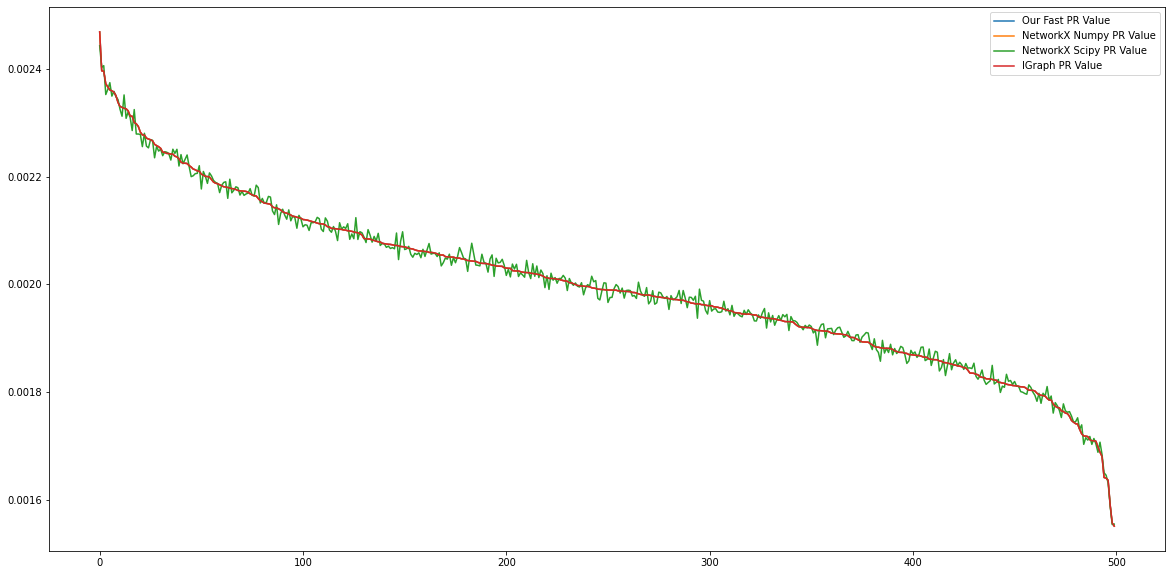

In [86]:
df = df.sort_values(by=pageranks_values_names[0], ascending = False)
df = df.reset_index(drop=True)

df.loc[:, df.columns != "Domain ID"].plot()

In [87]:
ranks_cols_names = ['Our PR Rank', 'NetworkX Numpy PR Rank',
                     'NetworkX Scipy PR Rank', 'IGraph PR Rank']
for i, name in enumerate(pageranks_values_names):
    df = df.sort_values(by=name, ascending = False)
    df = df.reset_index(drop=True)
    df[ranks_cols_names[i]] = df.index

df

,Domain ID,Our Fast PR Value,NetworkX Numpy PR Value,NetworkX Scipy PR Value,IGraph PR Value,Our PR Rank,NetworkX Numpy PR Rank,NetworkX Scipy PR Rank,IGraph PR Rank
0,348.0,0.002468,0.002468,0.002443,0.002468,0,0,0,0
1,55.0,0.002396,0.002396,0.002402,0.002396,1,1,2,1
2,126.0,0.002395,0.002395,0.002405,0.002395,2,2,1,2
3,353.0,0.002372,0.002372,0.002352,0.002372,3,3,6,3
4,166.0,0.002366,0.002366,0.002362,0.002366,4,4,4,4
...,...,...,...,...,...,...,...,...,...
495,494.0,0.001641,0.001641,0.001646,0.001641,495,495,495,495
496,473.0,0.001637,0.001637,0.001632,0.001637,496,496,496,496
497,355.0,0.001591,0.001591,0.001590,0.001591,497,497,497,497
498,448.0,0.001558,0.001558,0.001555,0.001558,498,498,499,498


Are all layers belong to one plot ? --  True


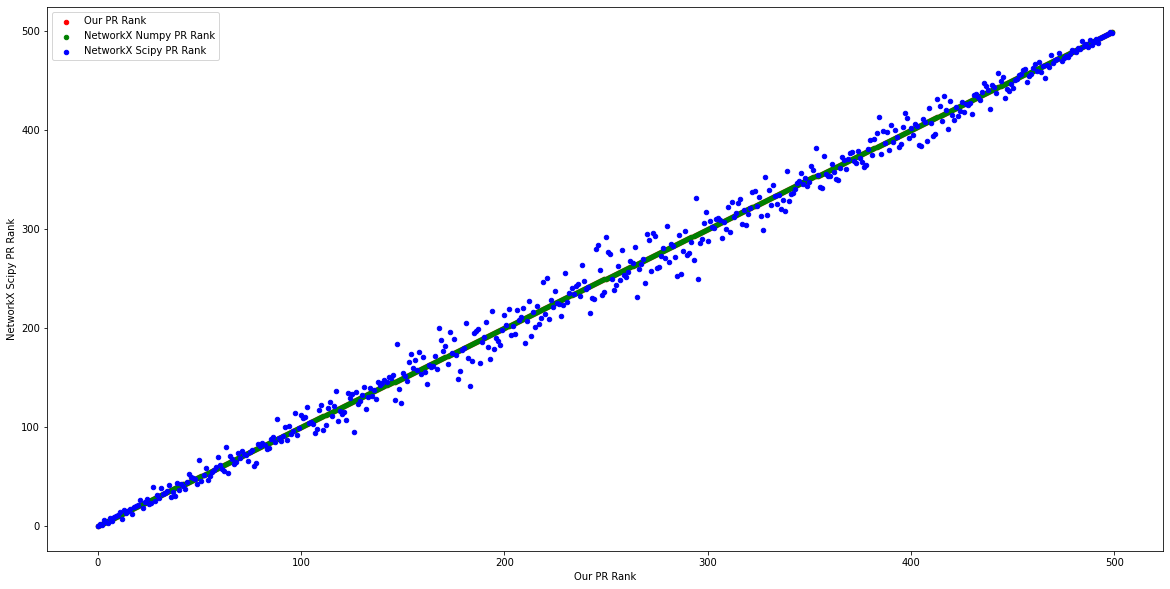

In [88]:
ax1 = df.plot.scatter(x=ranks_cols_names[0], y=ranks_cols_names[0], color='r')

colors = ['g', 'b', '#f0d001']

ax2 = df.plot.scatter(x=ranks_cols_names[0], y=ranks_cols_names[1], color=colors[0], ax=ax1)
ax3 = df.plot.scatter(x=ranks_cols_names[0], y=ranks_cols_names[2], color=colors[1], ax=ax1)

print("Are all layers belong to one plot ? -- ", ax1 == ax2 == ax3)

ax1.legend(ranks_cols_names[:3], ncol = 1 , loc = "upper left")

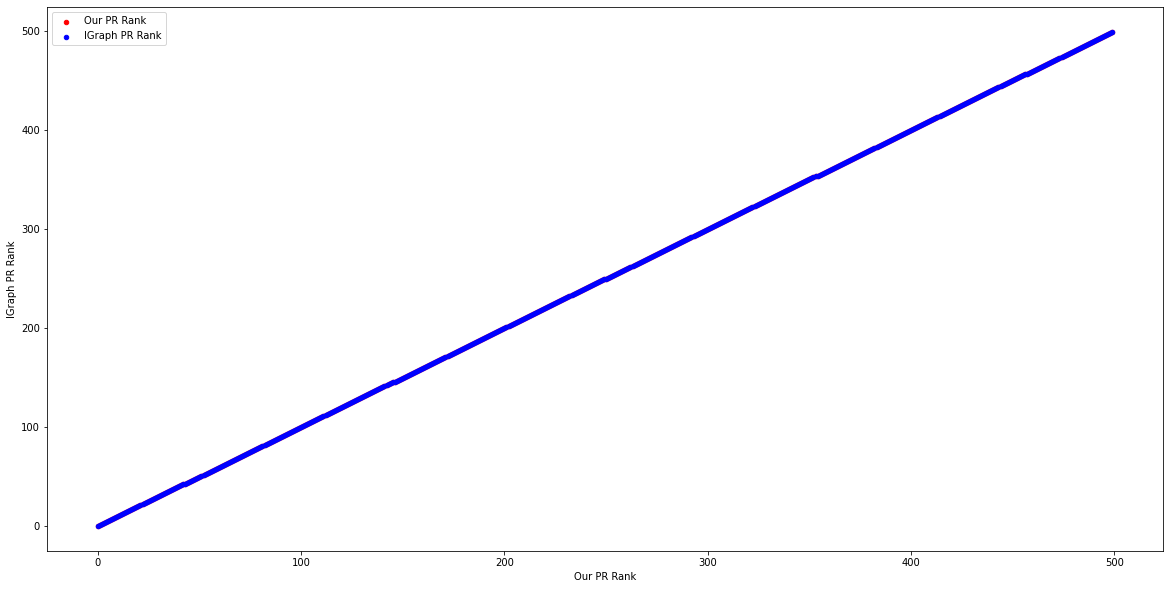

In [89]:
ax1_2 = df.plot.scatter(x=ranks_cols_names[0], y=ranks_cols_names[0], color='r')
ax2_2 = df.plot.scatter(x=ranks_cols_names[0], y=ranks_cols_names[3], color=colors[1], ax=ax1_2)

ax1_2.legend([ranks_cols_names[0], ranks_cols_names[3]], ncol = 1 , loc = "upper left")

In [90]:
# calculate Root Mean Square Error
for i in range(1, len(pageranks_values_names)):
    print(f"RMSR between {pageranks_values_names[0]} and {pageranks_values_names[i]}:",
        (( df[pageranks_values_names[0]] - df[pageranks_values_names[i]] ) ** 2).mean() ** .5)

RMSR between Our Fast PR Value and NetworkX Numpy PR Value: 1.1937852877780646e-12
RMSR between Our Fast PR Value and NetworkX Scipy PR Value: 1.076630394289089e-05
RMSR between Our Fast PR Value and IGraph PR Value: 1.193724100016418e-12


# Testing results of personalization

In [12]:
with open(os.path.join("files", "result_domain_ranks.json"), "r", encoding="utf-8") as f:
    result_ranks = json.load(f)

with open(os.path.join("files", "personalized_result_domain_ranks.json"), "r", encoding="utf-8") as f:
    personalized_result_ranks = json.load(f)

result_ranks = [result_ranks, personalized_result_ranks]

In [13]:
columns_names = ['Domain ID', 'Simple Pagerank Value', 'Personalized Pagerank Value']

new_df = pd.DataFrame(columns=columns_names)
len_columns_names = len(columns_names)

for domain in result_ranks[0].keys():
    new_row = [domain]

    for m in range(len_columns_names - 1):
        if result_ranks[m].get(domain, -1) != -1:
            new_row.append(result_ranks[m][domain])

    if len(new_row) == len_columns_names:
        new_df.loc[domain] = new_row

new_df.head()

,Domain ID,Simple Pagerank Value,Personalized Pagerank Value
https://facebook.com,https://facebook.com,0.008110,0.059909
https://twitter.com,https://twitter.com,0.004828,0.000630
https://google.com,https://google.com,0.004460,0.009668
https://youtube.com,https://youtube.com,0.003788,0.014861
https://developers.google.com,https://developers.google.com,0.003316,0.024029


In [14]:
new_df.describe()

,Simple Pagerank Value,Personalized Pagerank Value
count,846.000000,8.460000e+02
mean,0.001182,1.182033e-03
std,0.000415,5.053388e-03
min,0.001061,0.000000e+00
25%,0.001075,0.000000e+00
50%,0.001079,1.662562e-08
75%,0.001115,1.092220e-04
max,0.008110,5.990877e-02


In [15]:
ranks_cols_names = ['Simple Pagerank', 'Personalized Pagerank']
comparison_top_sites_df = pd.DataFrame()
for i, name in enumerate(columns_names[1:]):
    new_df = new_df.sort_values(by=name, ascending = False)
    new_df = new_df.reset_index(drop=True)
    comparison_top_sites_df[ranks_cols_names[i] + " Top Websites"] = new_df.loc[:49, columns_names[0]]

comparison_top_sites_df.insert(0, "Rank", [i + 1 for i in range(0, len(comparison_top_sites_df.index))])
comparison_top_sites_df

,Rank,Simple Pagerank Top Websites,Personalized Pagerank Top Websites
0,1,https://facebook.com,https://facebook.com
1,2,https://twitter.com,https://l.facebook.com
2,3,https://google.com,https://developers.facebook.com
3,4,https://youtube.com,https://portal.facebook.com
4,5,https://developers.google.com,https://pay.facebook.com
5,6,https://policies.google.com,https://es-la.facebook.com
6,7,https://l.facebook.com,https://hu-hu.facebook.com
7,8,https://instagram.com,https://fr-fr.facebook.com
8,9,https://linkedin.com,https://tr-tr.facebook.com
9,10,https://apple.com,https://ar-ar.facebook.com


# Benchmarking

In [ ]:
from src.pagerank import pagerank_power

import scipy as sp
import pandas as pd
import numpy as np
import timeit
import sys
import random
import igraph
import networkx as nx

In [ ]:
# benchmarking setup
n_tests_per_method = 5
number_of_graphs = 15
damping_factor = 0.85
tol = 1e-3

In [ ]:
def get_random_graph(
        min_size=20,
        max_size=2000,
        min_density=0.1,
        max_density=0.5):
    """
     Creates a random graph and a teleport vector and output them
        in different formats for different algorithms

    Inputs
    ------

    min_size and max_size: The size of the graph will be a random number
        in the range of (min_size, max_size)
    min_sparsity and max_sparsity: The sparcity of the graph
        will be a random number in the range of (min_sparsity, max_sparsity)

    Returns
    -------

    nx_graph: A random Graph for NetworkX
    A: The equivallent csr Adjacency matrix, for our PageRank
    iG: The equivallent iGraph
    personalize_vector: Personalization probabily vector
    personalize_dict: Personalization probabily vector,
                    in the form of a dictionary for NetworkX

    """
    graph_size = random.randint(min_size, max_size)
    p = random.uniform(min_density, max_density)

    A = sp.sparse.random(graph_size, graph_size, p, format='csr')
    nx_graph = nx.from_scipy_sparse_matrix(A, create_using=nx.DiGraph())

    iG = igraph.Graph(list(nx_graph.edges()), directed=True)
    iG.es['weight'] = A.data

    personalize_vector = np.random.random(graph_size)
    personalize_dict = dict(enumerate(personalize_vector.reshape(-1)))
    return A, nx_graph, iG, personalize_vector, personalize_dict


print("Work started")

node_size_vector = np.zeros(number_of_graphs)
edge_size_vector = np.zeros(number_of_graphs)
netx_pagerank_times_numpy = np.zeros(number_of_graphs)
netx_pagerank_times_scipy = np.zeros(number_of_graphs)
ig_pagerank_times = np.zeros(number_of_graphs)
pagerank_times = np.zeros(number_of_graphs)
pagerank_times_power = np.zeros(number_of_graphs)


for i in range(number_of_graphs):
    A, nx_graph, iG, personalize_vector, personalize_dict = get_random_graph()
    node_size_vector[i] = A.shape[0]
    edge_size_vector[i] = A.count_nonzero()
    print ("Graph %d: Nodes: %d, Edges: %d ..." %(i, node_size_vector[i], edge_size_vector[i]))
    sys.stdout.flush()

    netx_pagerank_times_numpy[i] = timeit.timeit(
        lambda: nx.pagerank_numpy(nx_graph, alpha=damping_factor),
        number=n_tests_per_method) / n_tests_per_method

    netx_pagerank_times_scipy[i] = timeit.timeit(
        lambda: nx.pagerank_scipy(nx_graph, alpha=damping_factor, tol=tol),
        number=n_tests_per_method) / n_tests_per_method

    #iGraph, only "prpack", which is their latest version.
    ig_pagerank_times[i] = timeit.timeit(
        lambda: iG.personalized_pagerank(directed=True,
                                         damping=damping_factor,
                                         weights=iG.es['weight'],
                                         implementation="prpack"),
        number=n_tests_per_method) / n_tests_per_method

    # Our implementations
    pagerank_times_power[i] = timeit.timeit(
        # lambda: pagerank_power(A, p=damping_factor, tol=tol),
        # number=n) / n
        lambda: pagerank_power(A),
        number=n_tests_per_method) / n_tests_per_method


argsort = edge_size_vector.argsort()

edge_size_vector_sorted = edge_size_vector[argsort]
node_size_vector_sorted = node_size_vector[argsort]

netx_pagerank_times_numpy_sorted = netx_pagerank_times_numpy[argsort]
netx_pagerank_times_scipy_sorted = netx_pagerank_times_scipy[argsort]

ig_pagerank_times_sorted = ig_pagerank_times[argsort]

pagerank_times_sorted = pagerank_times[argsort]
pagerank_times_power_sorted = pagerank_times_power[argsort]

comparison_table = pd.DataFrame(list(zip(node_size_vector_sorted,
                                         edge_size_vector_sorted,
                                         netx_pagerank_times_numpy_sorted,
                                         netx_pagerank_times_scipy_sorted,
                                         ig_pagerank_times_sorted,
                                         pagerank_times_sorted,
                                         pagerank_times_power_sorted)),
                                columns=['Nodes', 'Edges',
                                         'NetX (numpy)',
                                         'NetX (scipy)',
                                         'iGraph',
                                         '(fast) pagerank',
                                         '(fast) pagerank_power']).\
                    astype({'Nodes': 'int32', 'Edges': 'int32'})
comparison_table.to_csv('pagerank_methods_comparison.csv')
print("Done")

# Plotting speed results

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

comparison_table = pd.read_csv('pagerank_methods_comparison.csv', index_col=0)
comparison_table


In [ ]:
plt.ioff()
fig=plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')


plt.plot(comparison_table['Edges'], comparison_table['NetX (numpy)'],
         'v-', ms=8, lw=2, alpha=0.7, color='magenta',
         label='networkx.PageRank_numpy')

plt.plot(comparison_table['Edges'], comparison_table['NetX (scipy)'],
         'P-', ms=8, lw=2, alpha=0.7, color='blue',
         label='networkx.PageRank_scipy')

plt.plot(comparison_table['Edges'], comparison_table['iGraph'],
         'x-', ms=8, lw=2, alpha=0.7, color='black',
         label='iGraph_PageRank_ARPACK')

plt.plot(comparison_table['Edges'], comparison_table['(fast) pagerank_power'],
         '^-', ms=8, lw=2, alpha=0.7, color='green',
         label='fast_pagerank.pagerank_power')


plt.xlabel('Number of the edges')
plt.ylabel('Time (Seconds)')


plt.tight_layout()
plt.legend(loc=2)
plt.savefig('pagerank_methods_comparison.png')
plt.show()